In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_hotels=pd.read_csv("/content/dim_hotels.csv")
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


<Axes: xlabel='city'>

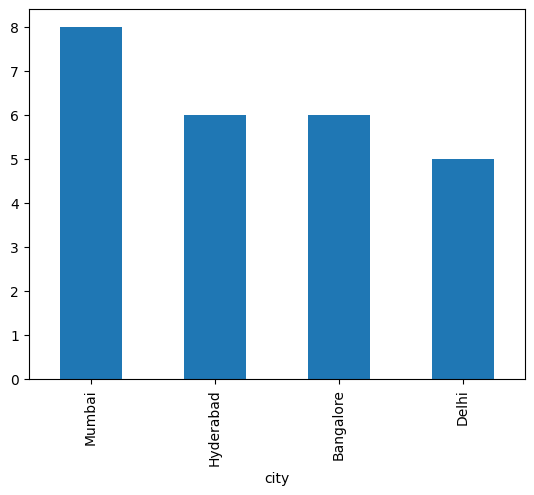

In [2]:
df_hotels.city.value_counts().plot(kind="bar")

In [3]:
df_hotels.shape

(25, 4)

In [4]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [5]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

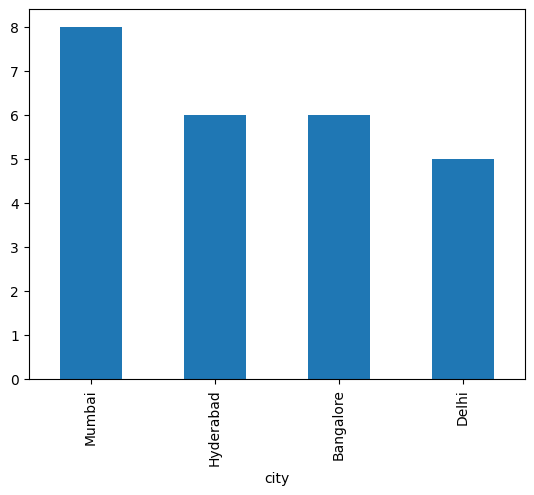

In [6]:
df_hotels.city.value_counts().plot(kind="bar")

In [8]:
df_agg_bookings=pd.read_csv("/content/fact_aggregated_bookings.csv")
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [9]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [10]:
x = pd.DataFrame(df_agg_bookings.groupby("property_id")["successful_bookings"]).sum()
x

0                                               451016
1    0      NaN
1      NaN
2      NaN
3      NaN
4 ...
dtype: object

In [11]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [12]:
df_agg_bookings.capacity.max()

50.0

In [13]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [14]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [15]:
df_agg_bookings.capacity.median()

25.0

In [16]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [17]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


In [18]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [19]:
df_agg_bookings.shape

(9200, 5)

In [20]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

In [21]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [22]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

<ipython-input-22-ba0564225658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)


In [23]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [24]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 760.8+ KB


In [25]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    0.578896
RT2    0.580097
RT3    0.580283
RT4    0.592776
Name: occ_pct, dtype: float64